In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('EV_train.csv')
test_data = pd.read_csv('EV_X_test.csv')


In [3]:
train_data.head()

,BuyEV,PriceBudgetRatio,range,HomeSlowChgWalkTime,WorkSlowChgWalkTime,FastChgTime,TownToFastChgDriveTime,HwyFastChgDistance,gender,race,...,used,NextCarBudget,PopDensity,orphan,ev_owner,priceshow,zip_median_home_value,state_elec_price,state_high_temp,state_precip
0,1,0.70,400,10,2,60,5,50,1,White,...,0,50000,72.60456,1,0,35000,239600,12.40,66.9,45.8
1,1,0.70,400,20,1,15,10,50,1,White,...,1,5000,139.79620,1,0,3500,117100,10.56,67.2,50.4
2,0,0.70,100,5,5,5,5,70,0,White,...,0,30000,476.37790,1,0,21000,151300,13.16,75.3,11.6
3,1,0.85,100,0,5,60,5,70,0,White,...,1,15000,166.24060,1,0,12750,93000,14.38,59.7,45.0
4,0,1.00,300,3,5,15,no,30,1,White,...,1,10000,4420.04400,1,0,10000,85900,16.07,55.0,33.9


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BuyEV                   4718 non-null   int64  
 1   PriceBudgetRatio        4718 non-null   float64
 2   range                   4718 non-null   int64  
 3   HomeSlowChgWalkTime     4718 non-null   int64  
 4   WorkSlowChgWalkTime     4718 non-null   int64  
 5   FastChgTime             4718 non-null   int64  
 6   TownToFastChgDriveTime  4718 non-null   object 
 7   HwyFastChgDistance      4718 non-null   object 
 8   gender                  4718 non-null   int64  
 9   race                    4718 non-null   object 
 10  state                   4718 non-null   object 
 11  license                 4718 non-null   object 
 12  edu                     4718 non-null   int64  
 13  employment              4718 non-null   int64  
 14  hsincome                4718 non-null   

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PriceBudgetRatio        1180 non-null   float64
 1   range                   1180 non-null   int64  
 2   HomeSlowChgWalkTime     1180 non-null   int64  
 3   WorkSlowChgWalkTime     1180 non-null   int64  
 4   FastChgTime             1180 non-null   int64  
 5   TownToFastChgDriveTime  1180 non-null   object 
 6   HwyFastChgDistance      1180 non-null   object 
 7   gender                  1180 non-null   int64  
 8   race                    1180 non-null   object 
 9   state                   1180 non-null   object 
 10  license                 1180 non-null   object 
 11  edu                     1180 non-null   int64  
 12  employment              1180 non-null   int64  
 13  hsincome                1180 non-null   int64  
 14  hhsize                  1180 non-null   

In [6]:
# check duplicates
train_data.duplicated().sum()

0

In [7]:
# check missing values
train_data.isnull().sum()

BuyEV                        0
PriceBudgetRatio             0
range                        0
HomeSlowChgWalkTime          0
WorkSlowChgWalkTime          0
FastChgTime                  0
TownToFastChgDriveTime       0
HwyFastChgDistance           0
gender                       0
race                         0
state                        0
license                      0
edu                          0
employment                   0
hsincome                     0
hhsize                       0
housit                       0
residence                    0
move                         0
all_car                      0
new_car                      0
ev                           0
new_ev                       0
home_parking              2705
hp2                       4253
hp3                       2452
hp4                       4071
hp5                       4170
hp6                       4633
HomeChgAvai                  0
work_parking                 0
WorkChgAvai                  0
buycar  

In [8]:
# check the number of unique values or categories of each column
for col_name in train_data.columns:
    unique_cat, name = len(train_data[col_name].unique()), train_data[col_name].unique()
    print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'BuyEV' has 2 unique categories
Feature 'PriceBudgetRatio' has 3 unique categories
Feature 'range' has 4 unique categories
Feature 'HomeSlowChgWalkTime' has 7 unique categories
Feature 'WorkSlowChgWalkTime' has 7 unique categories
Feature 'FastChgTime' has 4 unique categories
Feature 'TownToFastChgDriveTime' has 4 unique categories
Feature 'HwyFastChgDistance' has 4 unique categories
Feature 'gender' has 2 unique categories
Feature 'race' has 7 unique categories
Feature 'state' has 49 unique categories
Feature 'license' has 2 unique categories
Feature 'edu' has 8 unique categories
Feature 'employment' has 6 unique categories
Feature 'hsincome' has 9 unique categories
Feature 'hhsize' has 5 unique categories
Feature 'housit' has 4 unique categories
Feature 'residence' has 7 unique categories
Feature 'move' has 3 unique categories
Feature 'all_car' has 4 unique categories
Feature 'new_car' has 4 unique categories
Feature 'ev' has 4 unique categories
Feature 'new_ev' has 2 unique 

In [9]:
# examine frequency and relative frequency table of each column excluding the following

# Get a list of column names excluding specified columns
col_names = [col for col in train_data.columns if col not in ['zip_median_home_value', 'state_elec_price', 
                                                      'state_high_temp', 'state_precip', 'PopDensity', 
                                                      'zipcode']]

for column in col_names:
    print(f"Column: {column}")
    
    # Frequency table
    freq_table = train_data[column].value_counts()
    
    # Relative frequency table
    rel_freq_table = train_data[column].value_counts(normalize=True)
    
    # Combine both tables
    combined_table = pd.DataFrame({'Frequency': freq_table, 
                                 'Relative Frequency': rel_freq_table})
    print(combined_table)
    print("\n")


Column: BuyEV
   Frequency  Relative Frequency
1       2611            0.553412
0       2107            0.446588


Column: PriceBudgetRatio
      Frequency  Relative Frequency
0.85       1606            0.340398
1.00       1580            0.334888
0.70       1532            0.324714


Column: range
     Frequency  Relative Frequency
300       1255            0.266003
400       1171            0.248198
100       1155            0.244807
200       1137            0.240992


Column: HomeSlowChgWalkTime
    Frequency  Relative Frequency
1         705            0.149428
20        701            0.148580
0         698            0.147944
10        691            0.146460
5         689            0.146036
2         627            0.132895
3         607            0.128656


Column: WorkSlowChgWalkTime
    Frequency  Relative Frequency
5         710            0.150487
20        689            0.146036
2         681            0.144341
3         678            0.143705
1         670          

# Preliminary Data Preprocessing

#### Preprocess 'TownToFastChgDriveTime'
- replace 'no' with 100 and convert to int64

In [10]:
# Create a mapping dictionary for ordinal encoding
ordinal_mapping = {'5': 5, '10': 10, '15': 15, 'no': 100}

# Replace the values in the 'town' column with the ordinal encoding
train_data['TownToFastChgDriveTime'] = train_data['TownToFastChgDriveTime'].replace(ordinal_mapping)
test_data['TownToFastChgDriveTime'] = test_data['TownToFastChgDriveTime'].replace(ordinal_mapping)

# Preprocess 'HwyFastChgDistance'
- replace 'no' with 200 and convert to int64

In [11]:
# Create a mapping dictionary for ordinal encoding
ordinal_mapping = {'30': 30, '50': 50, '70': 70, 'no': 200}

# Replace the values in the 'town' column with the ordinal encoding
train_data['HwyFastChgDistance'] = train_data['HwyFastChgDistance'].replace(ordinal_mapping)
test_data['HwyFastChgDistance'] = test_data['HwyFastChgDistance'].replace(ordinal_mapping)

# Preprocessing 'race'
- merge 'American Indian or Alaska Native', 'Another race', 'Native Hawaiian or other Pacific Islander' to 'other'
- Apply one-hot encoding

In [12]:
# Replace specified categories with 'Others'
categories_to_merge = ['Another race', 'Native Hawaiian or other Pacific Islander',
                       'American Indian or Alaska Native', 'Prefer not to answer']
train_data['race'] = train_data['race'].replace(categories_to_merge, 'Others')
test_data['race'] = test_data['race'].replace(categories_to_merge, 'Others')

train_data['race'] = train_data['race'].replace('Black or African American', 'Black')
test_data['race'] = test_data['race'].replace('Black or African American', 'Black')

In [13]:
# Apply one-hot encoding to the 'race' column
train_data = pd.get_dummies(train_data, columns=['race'], prefix='race')
test_data = pd.get_dummies(test_data, columns=['race'], prefix='race')

# Preprocessing 'state'
- Merge low-frequency states with neighboring states.
    - 'Alabama', 'Mississippi', 90+60
    - 'Alaska', 'Idaho', 'Montana', 'South Dakota', 'Wyoming', 18+36+18+12+12
    - 'Arizona', 'New Mexico', 186+12
    - 'Arkansas', 'Louisiana', 36+84
    - 'California', 'Hawaii', 462
    - 'Colorado', 'Utah', 60+30
    - 'Connecticut', 'Massachusetts', 'Rhode Island', 60+138+42
    - 'Delaware', 'Maryland', 6+78
    - 'Florida', 522
    - 'Georgia', 162
    - 'Illinois', 246
    - 'Indiana', 162
    - 'Iowa', 'Nebraska', 54+48
    - 'Kansas', 'Missouri', 'Oklahoma', 48+150+60
    - 'Kentucky', 'West Virginia', 72+48
    - 'Maine', 'New Hampshire', 'Vermont', 24+30+12
    - 'Michigan', 216
    - 'Minnesota', 'Wisconsin', 96+90
    - 'Nevada', 96
    - 'New Jersey', 90
    - 'New York', 180
    - 'North Carolina', 258
    - 'Ohio', 192
    - 'Oregon', 144
    - 'Pennsylvania', 324
    - 'South Carolina', 72
    - 'Tennessee', 168
    - 'Texas', 456
    - 'Virginia', 132
    - 'Washington', 288
- Apply one-hot encoding

In [14]:
state_replacements = {
    'Alabama': 'AL+MS',
    'Mississippi': 'AL+MS',
    'Alaska': 'AK+ID+MT+SD+WY',
    'Idaho': 'AK+ID+MT+SD+WY',
    'Montana': 'AK+ID+MT+SD+WY',
    'South Dakota': 'AK+ID+MT+SD+WY',
    'Wyoming': 'AK+ID+MT+SD+WY',
    'Arizona': 'AZ+NM',
    'New Mexico': 'AZ+NM',
    'Arkansas': 'AR+LA',
    'Louisiana': 'AR+LA',
    'California': 'CA+HI',
    'Hawaii': 'CA+HI',
    'Colorado': 'CO+UT',
    'Utah': 'CO+UT',
    'Connecticut': 'CT+MA+RI',
    'Massachusetts': 'CT+MA+RI',
    'Rhode Island': 'CT+MA+RI',
    'Delaware': 'DE+MD',
    'Maryland': 'DE+MD',
    'Iowa': 'IA+NE',
    'Nebraska': 'IA+NE',
    'Kansas': 'KS+MO+OK',
    'Missouri': 'KS+MO+OK',
    'Oklahoma': 'KS+MO+OK',
    'Kentucky': 'KY+WV',
    'West Virginia': 'KY+WV',
    'Maine': 'ME+NH+VT',
    'New Hampshire': 'ME+NH+VT',
    'Vermont': 'ME+NH+VT',
    'Minnesota': 'MN+WI',
    'Wisconsin': 'MN+WI'
}

# Replace state names in the 'state' column
train_data['state'] = train_data['state'].replace(state_replacements)
test_data['state'] = test_data['state'].replace(state_replacements)

In [15]:
# Apply one-hot encoding to the 'state' column
train_data = pd.get_dummies(train_data, columns=['state'], prefix=None)
test_data = pd.get_dummies(test_data, columns=['state'], prefix=None)

# Preprocess 'employment'
- Apply one-hot encoding

In [16]:
# Apply one-hot encoding to the 'employment' column
train_data = pd.get_dummies(train_data, columns=['employment'], prefix='employment')
test_data = pd.get_dummies(test_data, columns=['employment'], prefix='employment')

# Preprocess 'housit'
- Merge 3 and 4
- one-hot encoding

In [17]:
# Merge categories 3 and 4 into a single category (e.g., category 3)
train_data['housit'] = train_data['housit'].replace({4: 3})
test_data['housit'] = test_data['housit'].replace({4: 3})

# Apply one-hot encoding to the 'housit' column
train_data = pd.get_dummies(train_data, columns=['housit'], prefix='housit')
test_data = pd.get_dummies(test_data, columns=['housit'], prefix='housit')

# Preprocess 'residence'
- Merge 2 and 3 to 2; 4 and 5 to 3; and 6, 7 and 8 to 4.
- One-hot encoding

In [18]:
# Define the replacements for the 'residence' column
residence_replacements = {
    2: 2,
    3: 2,
    4: 3,
    5: 3,
    6: 4,
    7: 4,
    8: 4
}

# Replace values in the 'residence' column
train_data['residence'] = train_data['residence'].replace(residence_replacements)
test_data['residence'] = test_data['residence'].replace(residence_replacements)

# Apply one-hot encoding to the 'residence' column
train_data = pd.get_dummies(train_data, columns=['residence'], prefix='residence')
test_data = pd.get_dummies(test_data, columns=['residence'], prefix='residence')

# Preprocess 'home_parking', 'hp2', etc.
- Handle NaN in 'home_parking', 'hp2', 'hp3', 'hp4', 'hp5', 'hp6'

In [19]:
# Handle NaN in 'home_parking', 'hp2', 'hp3', 'hp4', 'hp5', 'hp6'.

# List of columns to one-hot encode
columns_to_encode = ['home_parking', 'hp2', 'hp3', 'hp4', 'hp5', 'hp6']

# Perform one-hot encoding
for column in columns_to_encode:
    train_data[column] = train_data[column].notna().astype(int)
    test_data[column] = test_data[column].notna().astype(int)
    
    unique_cat, name = len(train_data[column].unique()), train_data[column].unique()
    print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=column, unique_cat=unique_cat))
    print("They are: '{name}".format(name=name))
    print(train_data[column].value_counts())
    print()

Feature 'home_parking' has 2 unique categories
They are: '[1 0]
0    2705
1    2013
Name: home_parking, dtype: int64

Feature 'hp2' has 2 unique categories
They are: '[0 1]
0    4253
1     465
Name: hp2, dtype: int64

Feature 'hp3' has 2 unique categories
They are: '[0 1]
0    2452
1    2266
Name: hp3, dtype: int64

Feature 'hp4' has 2 unique categories
They are: '[0 1]
0    4071
1     647
Name: hp4, dtype: int64

Feature 'hp5' has 2 unique categories
They are: '[0 1]
0    4170
1     548
Name: hp5, dtype: int64

Feature 'hp6' has 2 unique categories
They are: '[0 1]
0    4633
1      85
Name: hp6, dtype: int64



# Preprocess 'work_parking'
- one-hot encoding

In [20]:
# Apply one-hot encoding to the 'work_parking' column
train_data = pd.get_dummies(train_data, columns=['work_parking'], prefix='work_parking')
test_data = pd.get_dummies(test_data, columns=['work_parking'], prefix='work_parking')

# Preprocess 'home_chg_avail' and 'work_chg_avail'
- recode 'home_chg_avail' and 'work_chg_avail': Yes remains 1; No changed from 2 to -1; Not sure changed from 3 to 0.

In [21]:
# recode 'home_chg_avail', 'work_chg_avail'.
# Yes remains 1; No changed from 2 to -1; Not sure changed from 3 to 0.

# Define the replacement dictionary
replacement_dict = {2: -1, 3: 0}

# Replace values in columns 'X', 'Y', and 'Z' using the replacement_dict
train_data.replace({'HomeChgAvai': replacement_dict, 'WorkChgAvai': replacement_dict}, inplace=True)
test_data.replace({'HomeChgAvai': replacement_dict, 'WorkChgAvai': replacement_dict}, inplace=True)

print(train_data['HomeChgAvai'].value_counts())
print(train_data['WorkChgAvai'].value_counts())

-1    3665
 1     920
 0     133
Name: HomeChgAvai, dtype: int64
-1    2980
 1     962
 0     776
Name: WorkChgAvai, dtype: int64


# Preprocessing 'zipcode'
- geographical encoding: extract the first three-digit of 'zipcode'
    - The first digit represents a group of U.S. states. 
    - The second and third digits together represent a region in that group, which is the area distribution center for the USPS.

In [22]:
# investigate 'zipcode' that shares the same first 3-digit
# Ensure all zipcodes are strings to facilitate the operations
train_data['zipcode'] = train_data['zipcode'].astype(str)
test_data['zipcode'] = test_data['zipcode'].astype(str)

# Pad 4-digit zipcodes with a leading zero
train_data['zipcode'] = train_data['zipcode'].str.zfill(5)
test_data['zipcode'] = test_data['zipcode'].str.zfill(5)

# Extract the first 3 digits of each zipcode
train_data['zipcode_3digits'] = train_data['zipcode'].str[:3].astype('int64')
test_data['zipcode_3digits'] = test_data['zipcode'].str[:3].astype('int64')

# Create a frequency table for the first three digits of the zipcodes
zipcode_3digits_frequency_table = train_data['zipcode_3digits'].value_counts().reset_index()
zipcode_3digits_frequency_table.columns = ['zipcode_3digits', 'count']

# Sort the frequency table by 'zipcode_2digits' in ascending order
zipcode_3digits_frequency_table = zipcode_3digits_frequency_table.sort_values(by='zipcode_3digits')

# Display the frequency table
print(zipcode_3digits_frequency_table)

     zipcode_3digits  count
410               12      4
96                14     15
170               15     10
187               16      9
182               18      9
..               ...    ...
358              992      5
360              993      5
287              995      5
308              996      5
381              997      5

[457 rows x 2 columns]


In [23]:
train_data = train_data.drop('zipcode', axis=1)
test_data = test_data.drop('zipcode', axis=1)

# Preprocessing Numerical Features
- Identify numerical features and obtain descriptive statistics
- Plot histograms
- Compute skewness
- Apply log transform highly skewed features

In [24]:
# list of int64/float64 features with many unique values
num_features = ['zip_median_home_value', 'state_elec_price', 'state_high_temp', 'state_precip',
               'PopDensity', 'dmileage', 'gascost', 'age', 'priceshow']

train_data[num_features].describe()

,zip_median_home_value,state_elec_price,state_high_temp,state_precip,PopDensity,dmileage,gascost,age,priceshow
count,4.718000e+03,4718.000000,4718.000000,4718.000000,4718.000000,4718.000000,4718.000000,4718.000000,4718.000000
mean,2.062592e+05,13.560549,67.056571,39.778042,2986.998202,24.866469,93.325562,40.321111,19305.532005
std,1.336743e+05,3.416459,8.868069,12.521995,7263.438621,20.539242,63.325150,12.182752,10173.547858
min,4.560000e+04,9.370000,35.500000,10.200000,2.337699,0.000000,0.000000,19.000000,3500.000000
25%,1.228000e+05,11.360000,59.700000,28.600000,306.457300,10.000000,50.000000,31.000000,10500.000000
50%,1.676000e+05,12.400000,66.000000,43.500000,1287.688000,20.000000,80.000000,37.000000,17500.000000
75%,2.398000e+05,14.380000,75.300000,49.100000,3542.817000,30.000000,120.000000,48.000000,25500.000000
max,1.000001e+06,32.760000,81.900000,59.700000,128440.800000,100.000000,300.000000,76.000000,50000.000000


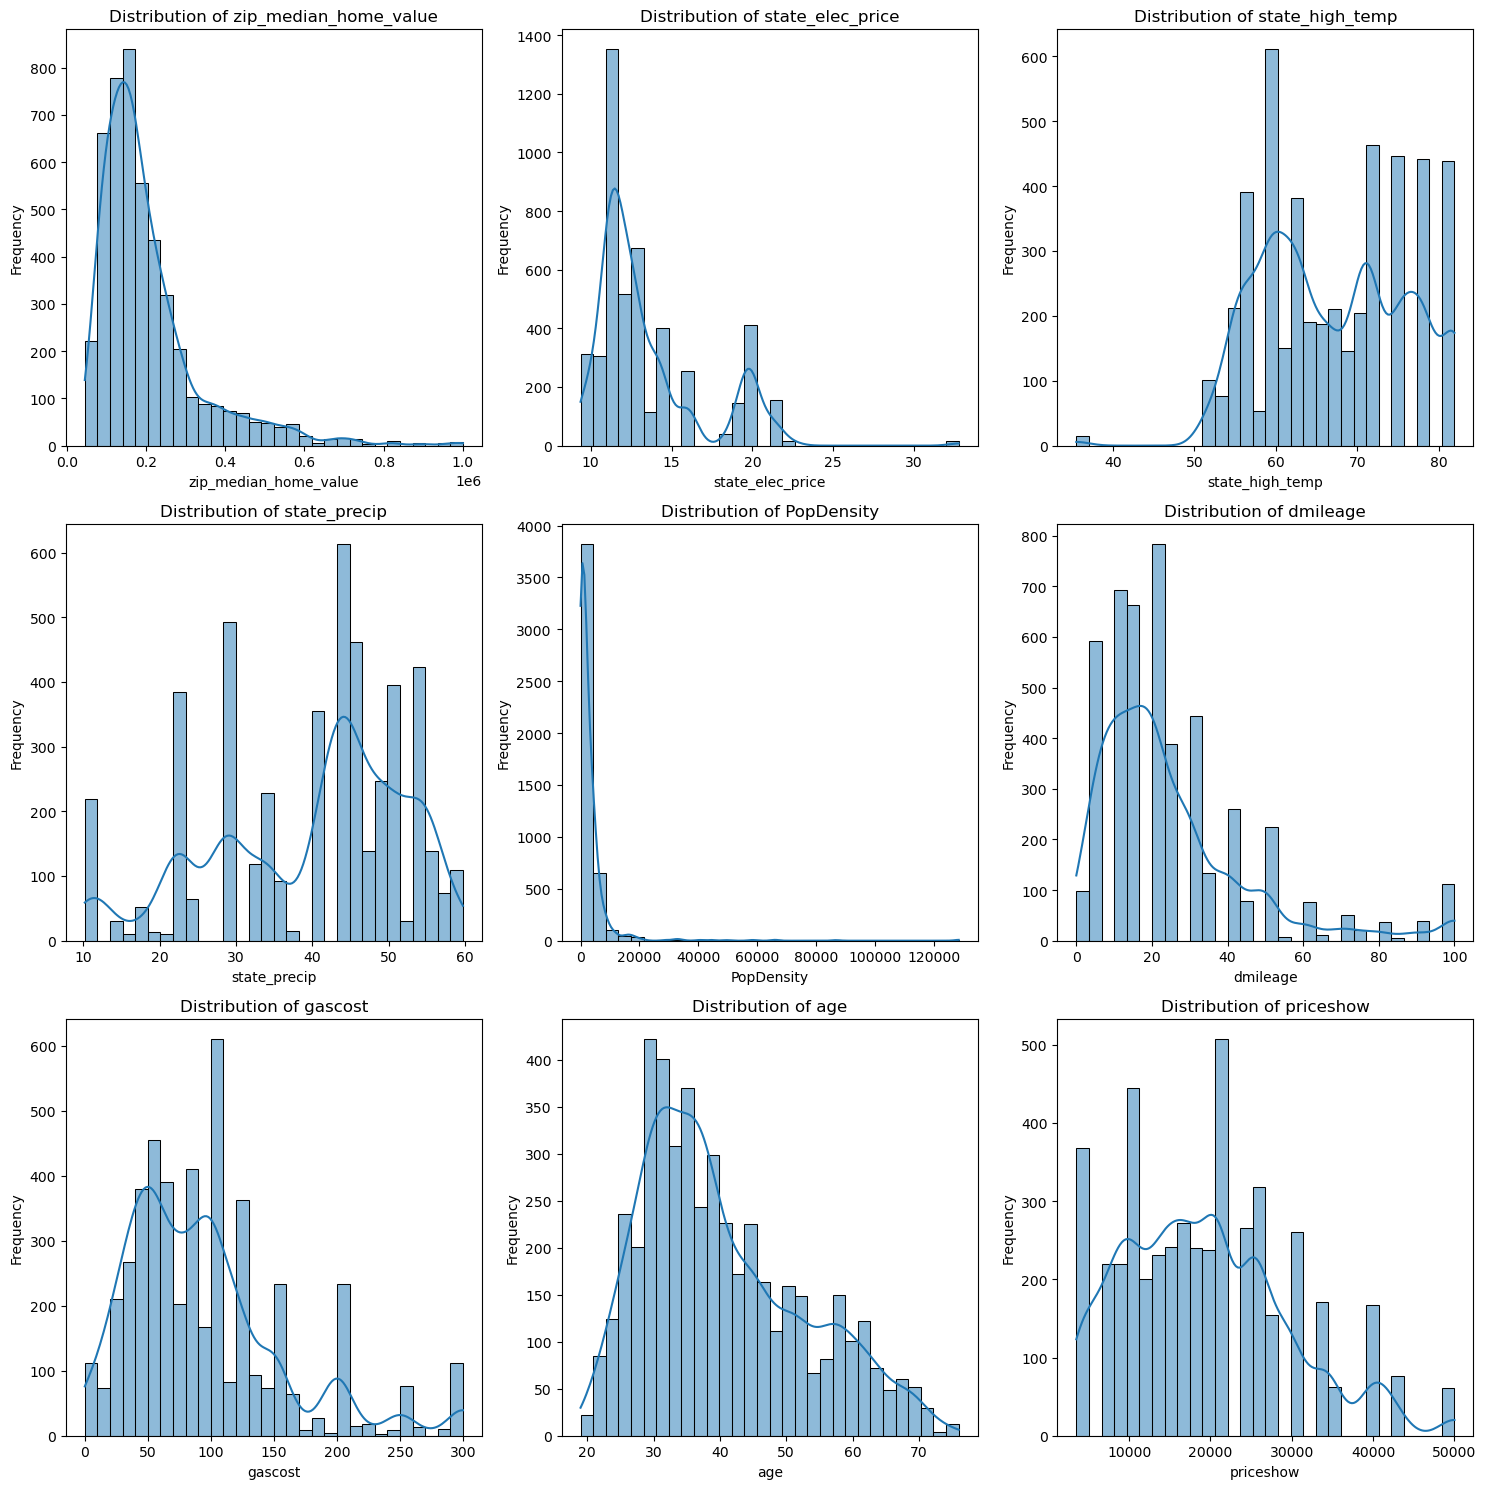

In [25]:
# histogram plots of num_features

# Set up a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the array of axes to iterate over it
axes = axes.flatten()

# Iterate over the list of features and the array of axes to plot each histogram
for i, feature in enumerate(num_features):
    sns.histplot(train_data[feature].dropna(), bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Adjust the layout so that plots are not overlapping
plt.tight_layout()

# Display the plot
plt.show()

In [26]:
from scipy.stats import skew

In [27]:
# Calculate and display skewness
skewness_values = {}
skewed_features = []

# Calculate and display skewness
for feature in num_features:
    skew_value = skew(train_data[feature])
    skewness_values[feature] = skew_value
    print(f"Skewness of {feature}: {skew_value}")
    
    # Check if the feature is highly skewed
    if skew_value >= 0.5:
        skewed_features.append(feature)

# Display skewed features
print(f"Highly skewed features: {skewed_features}")

Skewness of zip_median_home_value: 2.206697938821413
Skewness of state_elec_price: 1.5314551349523344
Skewness of state_high_temp: 0.03009349455570923
Skewness of state_precip: -0.6240639497580621
Skewness of PopDensity: 10.147572117660648
Skewness of dmileage: 1.7862174826842887
Skewness of gascost: 1.2481920639420636
Skewness of age: 0.6962007895414241
Skewness of priceshow: 0.6296959047881556
Highly skewed features: ['zip_median_home_value', 'state_elec_price', 'PopDensity', 'dmileage', 'gascost', 'age', 'priceshow']


In [28]:
# Initialize a dictionary to store the number of outliers for each feature
outliers_count = {}

# Calculate and display the number of outliers based on IQR
for feature in num_features:
    Q1 = train_data[feature].quantile(0.25)
    Q3 = train_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = train_data[(train_data[feature] < lower_bound) | (train_data[feature] > upper_bound)]
    num_outliers = outliers.shape[0]
    outliers_count[feature] = num_outliers
    
    print(f"Number of outliers in {feature}: {num_outliers}")

Number of outliers in zip_median_home_value: 384
Number of outliers in state_elec_price: 743
Number of outliers in state_high_temp: 15
Number of outliers in state_precip: 0
Number of outliers in PopDensity: 258
Number of outliers in dmileage: 275
Number of outliers in gascost: 223
Number of outliers in age: 13
Number of outliers in priceshow: 61


In [29]:
# Apply logarithm transformation to skewed features and create new columns
for feature in skewed_features:
    # Add 1 to each value to avoid log(0)
    train_data[f'log_{feature}'] = np.log1p(train_data[feature])
    test_data[f'log_{feature}'] = np.log1p(test_data[feature])

In [30]:
# Drop these features from the dataframe
train_data = train_data.drop(skewed_features, axis=1)
test_data = test_data.drop(skewed_features, axis=1)

# Feature Selection with Independence Test

In [31]:
from scipy.stats import chi2_contingency

In [32]:
# test for independence

# Create an empty DataFrame to store the results
results = []

for feature in train_data.columns:
    contingency_table = pd.crosstab(train_data['BuyEV'], train_data[feature])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    is_independent = p > 0.05
    results.append({'Feature': feature, 'P-Value': p, 'Independent': is_independent})

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results)

In [33]:
# Set the maximum number of rows to display
pd.set_option('display.max_rows', 100)

# Now, when you print the DataFrame, it will display all rows
print(results_df)

                      Feature        P-Value  Independent
0                       BuyEV   0.000000e+00        False
1            PriceBudgetRatio   4.635648e-25        False
2                       range   1.974615e-34        False
3         HomeSlowChgWalkTime   8.957663e-06        False
4         WorkSlowChgWalkTime   1.163204e-02        False
5                 FastChgTime   1.720809e-01         True
6      TownToFastChgDriveTime   1.659091e-20        False
7          HwyFastChgDistance   7.158814e-02         True
8                      gender   3.671994e-05        False
9                     license   7.778224e-01         True
10                        edu   7.338015e-04        False
11                   hsincome   7.741274e-01         True
12                     hhsize   4.877234e-07        False
13                       move   8.140691e-02         True
14                    all_car   2.609428e-02        False
15                    new_car   2.209461e-01         True
16            

In [34]:
# Get a list of independent features
independent_features = results_df.loc[results_df['Independent'] == True, 'Feature'].tolist()

# Drop these features from the dataframe
train_data = train_data.drop(columns=independent_features)
test_data = test_data.drop(columns=independent_features)

Text(0.5, 1.0, 'Correlation matrix')

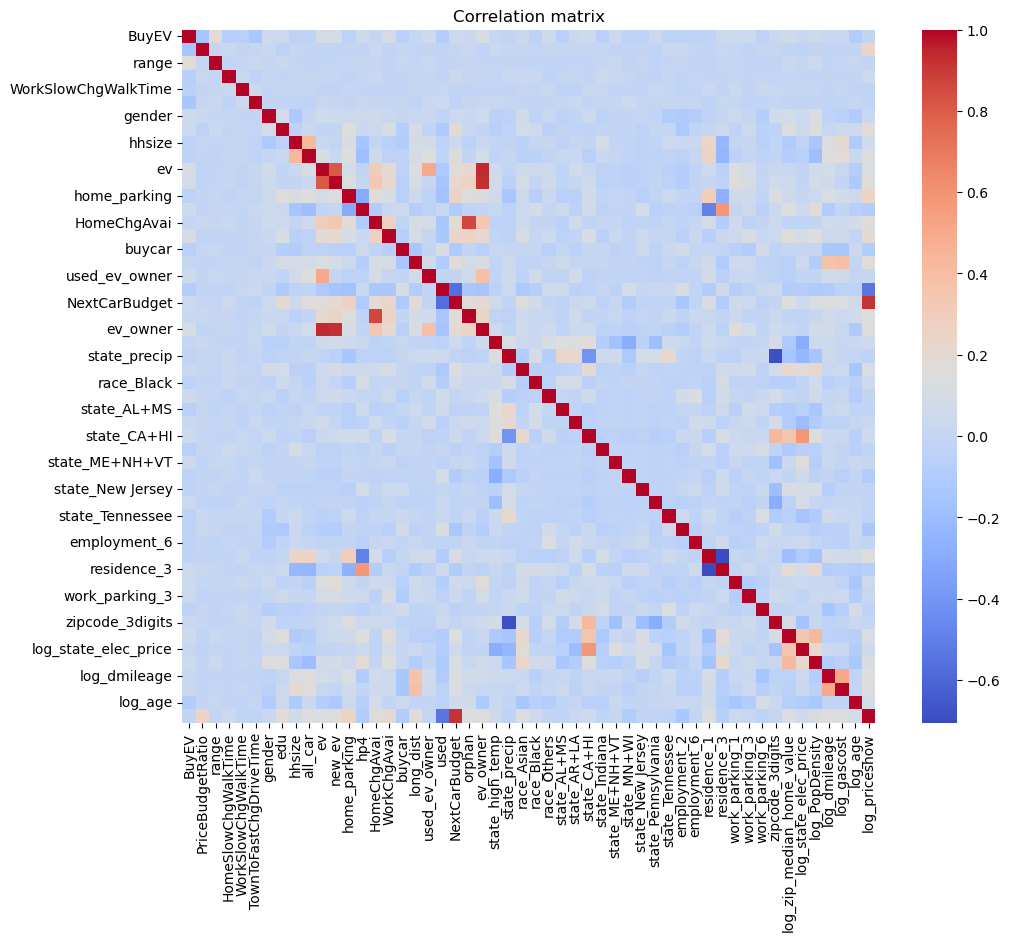

In [35]:
# Calculate correlation matrix
# corr_matrix = df[selected_columns].corr()
corr_matrix = train_data.corr()

# Create heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, square=True)
plt.title("Correlation matrix")
# plt.show()

In [36]:
# Filter the correlation matrix to identify pairs of features that have a high correlation
filtered_pairs = corr_matrix[(corr_matrix >= 0.5) | (corr_matrix <= -0.5)]

# Get the column names
columns = filtered_pairs.columns

# Create a set to store unique pairs
unique_pairs = set()

# Iterate over the columns
for i, col in enumerate(columns):
    # Get the pairs for the current column
    current_pairs = filtered_pairs[col].dropna()
    
    # Exclude self-correlation
    current_pairs = current_pairs.drop(col, errors='ignore')
    
    # Check if the pair has already been added in a different order
    for j in range(i + 1, len(columns)):
        pair_col = columns[j]
        if pair_col in current_pairs.index:
            unique_pairs.add((col, pair_col, filtered_pairs.loc[pair_col, col]))
    
# Print the unique pairs with correlation coefficients
for pair in unique_pairs:
    print(f"Pair: {pair[0]}, {pair[1]}  |  Correlation: {pair[2]}")

Pair: state_CA+HI, log_state_elec_price  |  Correlation: 0.5843684543187306
Pair: new_ev, ev_owner  |  Correlation: 0.9215579780399309
Pair: ev, used_ev_owner  |  Correlation: 0.5024814797055873
Pair: ev, new_ev  |  Correlation: 0.8107623120997091
Pair: residence_1, residence_3  |  Correlation: -0.7046982879473261
Pair: log_dmileage, log_gascost  |  Correlation: 0.5091003804924619
Pair: ev, ev_owner  |  Correlation: 0.9343296318769904
Pair: HomeChgAvai, orphan  |  Correlation: 0.863779739839092
Pair: NextCarBudget, log_priceshow  |  Correlation: 0.9172952007043751
Pair: hp4, residence_3  |  Correlation: 0.5751595872639107
Pair: used, NextCarBudget  |  Correlation: -0.5707605597602153
Pair: state_precip, zipcode_3digits  |  Correlation: -0.6889568002104356
Pair: used, log_priceshow  |  Correlation: -0.5443382989609299


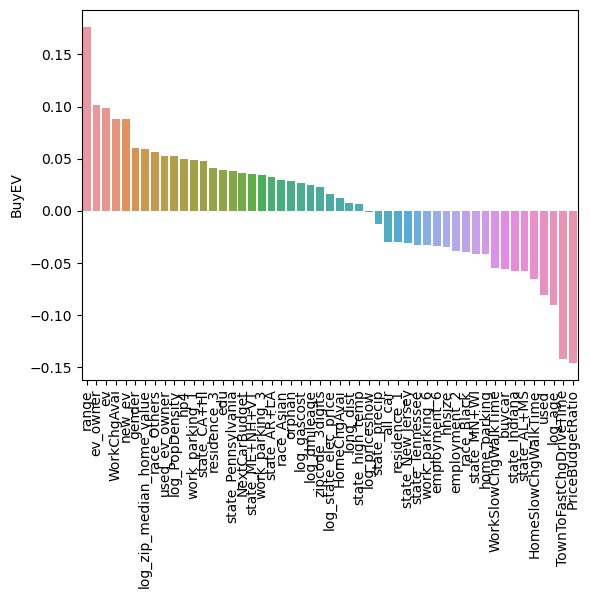

In [37]:
# visualize the correlation coefficients of all features with the target variable 'BuyEV'
corr_with_target = corr_matrix['BuyEV'].sort_values(ascending=False)[1:]
sns.barplot(x=corr_with_target.index, y=corr_with_target)
plt.xticks(rotation=90)
plt.show()

In [38]:
# display the correlation coefficients of all features with the target variable 'BuyEV'
corr_with_target

range                        0.176644
ev_owner                     0.101209
ev                           0.098777
WorkChgAvai                  0.088553
new_ev                       0.087780
gender                       0.060513
log_zip_median_home_value    0.059028
race_Others                  0.056324
used_ev_owner                0.052570
log_PopDensity               0.052240
hp4                          0.049505
work_parking_1               0.048488
state_CA+HI                  0.047790
residence_3                  0.041460
edu                          0.039363
state_Pennsylvania           0.037826
NextCarBudget                0.036602
state_ME+NH+VT               0.035466
work_parking_3               0.034451
state_AR+LA                  0.032832
race_Asian                   0.029741
orphan                       0.028843
log_gascost                  0.026890
log_dmileage                 0.025105
zipcode_3digits              0.022793
log_state_elec_price         0.015930
HomeChgAvai 

# Remove some highly correlated features

In [39]:
train_data = train_data.drop(['NextCarBudget', 'ev', 'new_ev', 'orphan'], axis=1)
test_data = test_data.drop(['NextCarBudget', 'ev', 'new_ev', 'orphan'], axis=1)

In [40]:
train_data.head()

,BuyEV,PriceBudgetRatio,range,HomeSlowChgWalkTime,WorkSlowChgWalkTime,TownToFastChgDriveTime,gender,edu,hhsize,all_car,...,work_parking_3,work_parking_6,zipcode_3digits,log_zip_median_home_value,log_state_elec_price,log_PopDensity,log_dmileage,log_gascost,log_age,log_priceshow
0,1,0.70,400,10,2,5,1,5,4,2,...,0,0,229,12.386730,2.595255,4.298707,4.110874,5.303305,3.713572,10.463132
1,1,0.70,400,20,1,10,1,5,3,1,...,0,0,420,11.670792,2.447551,4.947313,1.791759,3.931826,3.663562,8.160804
2,0,0.70,100,5,5,5,0,6,1,1,...,0,0,863,11.927027,2.650421,6.168308,2.397895,3.713572,3.988984,9.952325
3,1,0.85,100,0,5,5,0,4,1,1,...,0,0,161,11.440366,2.733068,5.119433,3.583519,5.525453,3.637586,9.453365
4,0,1.00,300,3,5,100,1,3,5,2,...,0,0,481,11.360951,2.837323,8.394131,3.433987,5.303305,3.713572,9.210440


In [41]:
test_data.head()

,PriceBudgetRatio,range,HomeSlowChgWalkTime,WorkSlowChgWalkTime,TownToFastChgDriveTime,gender,edu,hhsize,all_car,home_parking,...,work_parking_3,work_parking_6,zipcode_3digits,log_zip_median_home_value,log_state_elec_price,log_PopDensity,log_dmileage,log_gascost,log_age,log_priceshow
0,0.70,100,10,1,15,0,3,2,1,0,...,0,0,973,12.029341,2.486572,4.599533,1.791759,4.615121,3.295837,8.853808
1,0.70,200,3,3,5,0,5,2,1,0,...,0,0,787,12.044735,2.514465,8.334872,3.258097,4.709530,3.433987,9.952325
2,0.70,100,10,1,15,0,3,3,1,0,...,0,0,74,12.598794,2.811809,5.452997,3.044522,4.615121,3.433987,8.853808
3,0.85,400,1,5,10,1,5,3,2,1,...,0,0,784,11.047726,2.514465,8.572278,1.791759,5.351858,3.295837,10.657283
4,1.00,300,5,2,15,1,5,4,2,1,...,0,0,303,12.983104,2.584752,7.928340,3.713572,4.615121,3.583519,10.819798


In [42]:
train_final = train_data.drop('BuyEV', axis=1)


In [43]:
train_final.head()

,PriceBudgetRatio,range,HomeSlowChgWalkTime,WorkSlowChgWalkTime,TownToFastChgDriveTime,gender,edu,hhsize,all_car,home_parking,...,work_parking_3,work_parking_6,zipcode_3digits,log_zip_median_home_value,log_state_elec_price,log_PopDensity,log_dmileage,log_gascost,log_age,log_priceshow
0,0.70,400,10,2,5,1,5,4,2,1,...,0,0,229,12.386730,2.595255,4.298707,4.110874,5.303305,3.713572,10.463132
1,0.70,400,20,1,10,1,5,3,1,0,...,0,0,420,11.670792,2.447551,4.947313,1.791759,3.931826,3.663562,8.160804
2,0.70,100,5,5,5,0,6,1,1,1,...,0,0,863,11.927027,2.650421,6.168308,2.397895,3.713572,3.988984,9.952325
3,0.85,100,0,5,5,0,4,1,1,1,...,0,0,161,11.440366,2.733068,5.119433,3.583519,5.525453,3.637586,9.453365
4,1.00,300,3,5,100,1,3,5,2,0,...,0,0,481,11.360951,2.837323,8.394131,3.433987,5.303305,3.713572,9.210440


In [44]:
train_final.columns

Index(['PriceBudgetRatio', 'range', 'HomeSlowChgWalkTime',
       'WorkSlowChgWalkTime', 'TownToFastChgDriveTime', 'gender', 'edu',
       'hhsize', 'all_car', 'home_parking', 'hp4', 'HomeChgAvai',
       'WorkChgAvai', 'buycar', 'long_dist', 'used_ev_owner', 'used',
       'ev_owner', 'state_high_temp', 'state_precip', 'race_Asian',
       'race_Black', 'race_Others', 'state_AL+MS', 'state_AR+LA',
       'state_CA+HI', 'state_Indiana', 'state_ME+NH+VT', 'state_MN+WI',
       'state_New Jersey', 'state_Pennsylvania', 'state_Tennessee',
       'employment_2', 'employment_6', 'residence_1', 'residence_3',
       'work_parking_1', 'work_parking_3', 'work_parking_6', 'zipcode_3digits',
       'log_zip_median_home_value', 'log_state_elec_price', 'log_PopDensity',
       'log_dmileage', 'log_gascost', 'log_age', 'log_priceshow'],
      dtype='object')

In [45]:
#Separate X and y variables
predictors =['PriceBudgetRatio', 'range', 'HomeSlowChgWalkTime',
       'WorkSlowChgWalkTime', 'TownToFastChgDriveTime', 'gender', 'edu',
       'hhsize', 'all_car', 'home_parking', 'hp4', 'HomeChgAvai',
       'WorkChgAvai', 'buycar', 'long_dist', 'used_ev_owner', 'used',
       'ev_owner', 'state_high_temp', 'state_precip', 'race_Asian',
       'race_Black', 'race_Others', 'state_AL+MS', 'state_AR+LA',
       'state_CA+HI', 'state_Indiana', 'state_ME+NH+VT', 'state_MN+WI',
       'state_New Jersey', 'state_Pennsylvania', 'state_Tennessee',
       'employment_2', 'employment_6', 'residence_1', 'residence_3',
       'work_parking_1', 'work_parking_3', 'work_parking_6', 'zipcode_3digits',
       'log_zip_median_home_value', 'log_state_elec_price', 'log_PopDensity',
       'log_dmileage', 'log_gascost', 'log_age', 'log_priceshow']
outcome = ['BuyEV']
X = train_final[predictors]
y = train_data[outcome]


In [46]:
X.head()

,PriceBudgetRatio,range,HomeSlowChgWalkTime,WorkSlowChgWalkTime,TownToFastChgDriveTime,gender,edu,hhsize,all_car,home_parking,...,work_parking_3,work_parking_6,zipcode_3digits,log_zip_median_home_value,log_state_elec_price,log_PopDensity,log_dmileage,log_gascost,log_age,log_priceshow
0,0.70,400,10,2,5,1,5,4,2,1,...,0,0,229,12.386730,2.595255,4.298707,4.110874,5.303305,3.713572,10.463132
1,0.70,400,20,1,10,1,5,3,1,0,...,0,0,420,11.670792,2.447551,4.947313,1.791759,3.931826,3.663562,8.160804
2,0.70,100,5,5,5,0,6,1,1,1,...,0,0,863,11.927027,2.650421,6.168308,2.397895,3.713572,3.988984,9.952325
3,0.85,100,0,5,5,0,4,1,1,1,...,0,0,161,11.440366,2.733068,5.119433,3.583519,5.525453,3.637586,9.453365
4,1.00,300,3,5,100,1,3,5,2,0,...,0,0,481,11.360951,2.837323,8.394131,3.433987,5.303305,3.713572,9.210440


In [47]:
y.head()

,BuyEV
0,1
1,1
2,0
3,1
4,0


In [48]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [49]:
# Initialize the estimator
estimator = RandomForestClassifier(random_state=314)

# Initialize RFE
# Here, we are specifying to select top 50 features. You can change this number as per your needs.
num_features_to_select = 50
rfe = RFE(estimator, n_features_to_select=num_features_to_select)

# Fit RFE
rfe.fit(X, y)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_rfe.py:310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X[:, features], y, **fit_params)


RFE(estimator=RandomForestClassifier(random_state=314), n_features_to_select=50)

In [50]:
# Get Selected Features
selected_features = X.columns[rfe.support_]

# Get Feature Importances
feature_importances = rfe.estimator_.feature_importances_

# Creating a series with feature names and their scores
importance_series = pd.Series(feature_importances, index=selected_features)

# Sorting the series in descending order to get most important features at the top
sorted_importances = importance_series.sort_values(ascending=False)

# Displaying the sorted importances
print(sorted_importances)

log_zip_median_home_value    0.061692
log_PopDensity               0.061304
log_age                      0.059039
zipcode_3digits              0.056185
range                        0.055763
log_priceshow                0.054425
HomeSlowChgWalkTime          0.050743
WorkSlowChgWalkTime          0.048709
log_gascost                  0.044188
TownToFastChgDriveTime       0.043131
log_dmileage                 0.041636
log_state_elec_price         0.039470
state_precip                 0.038173
PriceBudgetRatio             0.037713
state_high_temp              0.037674
hhsize                       0.028693
edu                          0.027487
long_dist                    0.026181
all_car                      0.018741
buycar                       0.017705
WorkChgAvai                  0.017221
gender                       0.011799
home_parking                 0.011757
used                         0.011082
HomeChgAvai                  0.009518
residence_1                  0.009470
work_parking

In [51]:
# Filter features with importance scores 
selected_features = sorted_importances[sorted_importances >= 0.005].index

# Create a new DataFrame containing only the selected features
X_selected = X[selected_features]
X_test_selected = test_data[selected_features]

X_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   log_zip_median_home_value  4718 non-null   float64
 1   log_PopDensity             4718 non-null   float64
 2   log_age                    4718 non-null   float64
 3   zipcode_3digits            4718 non-null   int64  
 4   range                      4718 non-null   int64  
 5   log_priceshow              4718 non-null   float64
 6   HomeSlowChgWalkTime        4718 non-null   int64  
 7   WorkSlowChgWalkTime        4718 non-null   int64  
 8   log_gascost                4718 non-null   float64
 9   TownToFastChgDriveTime     4718 non-null   int64  
 10  log_dmileage               4718 non-null   float64
 11  log_state_elec_price       4718 non-null   float64
 12  state_precip               4718 non-null   float64
 13  PriceBudgetRatio           4718 non-null   float

In [52]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [53]:
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.25, random_state=42)

In [54]:
# Initialize the RobustScaler
scaler = MinMaxScaler()

# Fit the scaler using the training data and transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test_selected)

In [55]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

pred_train = rf.predict(X_train_scaled)
pred_val = rf.predict(X_val_scaled)

print("Training set accuracy : ", accuracy_score(y_train, pred_train))
print("Validation set Accuracy : ", accuracy_score(y_val, pred_val))
print(confusion_matrix(y_val, pred_val))
print(classification_report(y_val, pred_val))
auc = roc_auc_score(y_val,pred_val)
print("AUC:", auc)

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_2491/316644195.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_scaled, y_train)


Training set accuracy :  1.0
Validation set Accuracy :  0.7584745762711864
[[330 165]
 [120 565]]
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       495
           1       0.77      0.82      0.80       685

    accuracy                           0.76      1180
   macro avg       0.75      0.75      0.75      1180
weighted avg       0.76      0.76      0.76      1180

AUC: 0.745742092457421


In [56]:
# Create a Random Forest classifier
rf = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 3, 4, 5],  # Minimum number of samples required at each leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at each split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=5, random_state=1, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y wa

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800]},
                   random_state=1)

In [57]:
RF_best = random_search.best_estimator_

pred_train = RF_best.predict(X_train_scaled)
pred_val = RF_best.predict(X_val_scaled)
pred_test = RF_best.predict(X_test_scaled)

print("Training set accuracy : ", accuracy_score(y_train, pred_train))
print("Validation set Accuracy : ", accuracy_score(y_val, pred_val))
print(confusion_matrix(y_val, pred_val))
print(classification_report(y_val, pred_val))
auc = roc_auc_score(y_val,pred_val)
print("AUC:", auc)

Training set accuracy :  0.9988694177501414
Validation set Accuracy :  0.7542372881355932
[[330 165]
 [125 560]]
              precision    recall  f1-score   support

           0       0.73      0.67      0.69       495
           1       0.77      0.82      0.79       685

    accuracy                           0.75      1180
   macro avg       0.75      0.74      0.74      1180
weighted avg       0.75      0.75      0.75      1180

AUC: 0.7420924574209247


In [58]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting classifier
gb = GradientBoostingClassifier()

# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2']
}

# Perform RandomizedSearchCV for Gradient Boosting
random_search_gb = RandomizedSearchCV(estimator=gb, param_distributions=param_grid_gb, n_iter=10, cv=5, random_state=1, n_jobs=-1)
random_search_gb.fit(X_train_scaled, y_train)

# Get the best Gradient Boosting model
gb_best = random_search_gb.best_estimator_

# Predictions and Evaluation on Training and Validation Sets with the best Gradient Boosting model
pred_train_gb = gb_best.predict(X_train_scaled)
pred_val_gb = gb_best.predict(X_val_scaled)

print("Training set accuracy (Gradient Boosting): ", accuracy_score(y_train, pred_train_gb))
print("Validation set Accuracy (Gradient Boosting): ", accuracy_score(y_val, pred_val_gb))
print(confusion_matrix(y_val, pred_val_gb))
print(classification_report(y_val, pred_val_gb))
auc_gb = roc_auc_score(y_val, pred_val_gb)



/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Training set accuracy (Gradient Boosting):  0.9997173544375353
Validation set Accuracy (Gradient Boosting):  0.7779661016949152
[[355 140]
 [122 563]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       495
           1       0.80      0.82      0.81       685

    accuracy                           0.78      1180
   macro avg       0.77      0.77      0.77      1180
weighted avg       0.78      0.78      0.78      1180



In [61]:
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

# Create an XGBoost classifier
xgb = XGBClassifier()

# Define a parameter grid for grid search
param_grid_xgb = {
    'n_estimators': [300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 5, 6],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Perform GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, n_jobs=-1)
grid_search_xgb.fit(X_train_scaled, y_train)

# Get the best XGBoost model
xgb_best = grid_search_xgb.best_estimator_

# Evaluate the model
pred_train_xgb = gb_best.predict(X_train_scaled)
pred_val_xgb = xgb_best.predict(X_val_scaled)
print("Training set accuracy (XGBoost): ", accuracy_score(y_train, pred_train_xgb))
print("Validation set Accuracy (XGBoost): ", accuracy_score(y_val, pred_val_xgb))
print(confusion_matrix(y_val, pred_val_xgb))
print(classification_report(y_val, pred_val_xgb))



Training set accuracy (XGBoost):  0.9997173544375353
Validation set Accuracy (XGBoost):  0.7677966101694915
[[350 145]
 [129 556]]
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       495
           1       0.79      0.81      0.80       685

    accuracy                           0.77      1180
   macro avg       0.76      0.76      0.76      1180
weighted avg       0.77      0.77      0.77      1180



In [65]:
from sklearn.ensemble import VotingClassifier


# Initialize the Voting Classifier with Gradient Boosting and XGBoost as estimators
voting_model = VotingClassifier(estimators=[
    ('gb', gb_best),  # Gradient Boosting model
    ('xgb', xgb_best)  # XGBoost model from GridSearchCV
], voting='soft')  # Soft voting for probability averaging

# Fit the voting model to your training data
voting_model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
pred_train_vote = voting_model.predict(X_train_scaled)
voting_predictions = voting_model.predict(X_val_scaled)

# Evaluate the voting model
print("Training set accuracy (VotingClassifier): ", accuracy_score(y_train, pred_train_vote))
print("Validation set Accuracy (Voting Ensemble): ", accuracy_score(y_val, voting_predictions))
print(confusion_matrix(y_val, voting_predictions))
print(classification_report(y_val, voting_predictions))


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training set accuracy (VotingClassifier):  0.9988694177501414
Validation set Accuracy (Voting Ensemble):  0.7677966101694915
[[352 143]
 [131 554]]
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       495
           1       0.79      0.81      0.80       685

    accuracy                           0.77      1180
   macro avg       0.76      0.76      0.76      1180
weighted avg       0.77      0.77      0.77      1180



# After achieving an accuracy of approximately 78% with Gradient Boosting, I proceeded to utilize this model to predict the test data.








In [68]:
# Make predictions on the test data
test_predictions = gb_best.predict(X_test_selected)

# Create a DataFrame with the predictions
predictions_df = pd.DataFrame({'BuyEV': test_predictions})


# Concatenate the test data with the predicted BuyEV values
test_data_with_predictions = pd.concat([test_data.reset_index(drop=True), predictions_df], axis=1)



/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [69]:
test_data_with_predictions.head()

,PriceBudgetRatio,range,HomeSlowChgWalkTime,WorkSlowChgWalkTime,TownToFastChgDriveTime,gender,edu,hhsize,all_car,home_parking,...,work_parking_6,zipcode_3digits,log_zip_median_home_value,log_state_elec_price,log_PopDensity,log_dmileage,log_gascost,log_age,log_priceshow,BuyEV
0,0.70,100,10,1,15,0,3,2,1,0,...,0,973,12.029341,2.486572,4.599533,1.791759,4.615121,3.295837,8.853808,1
1,0.70,200,3,3,5,0,5,2,1,0,...,0,787,12.044735,2.514465,8.334872,3.258097,4.709530,3.433987,9.952325,1
2,0.70,100,10,1,15,0,3,3,1,0,...,0,74,12.598794,2.811809,5.452997,3.044522,4.615121,3.433987,8.853808,0
3,0.85,400,1,5,10,1,5,3,2,1,...,0,784,11.047726,2.514465,8.572278,1.791759,5.351858,3.295837,10.657283,0
4,1.00,300,5,2,15,1,5,4,2,1,...,0,303,12.983104,2.584752,7.928340,3.713572,4.615121,3.583519,10.819798,0


In [70]:
# Save the DataFrame with predictions to a CSV file
test_data_with_predictions.to_csv('EV_test_pred_yd5783.csv', index=False)